In [131]:
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import copy
from pandas.tseries.offsets import *
df = []

df.append(pandas.read_csv("Images_Russia.csv", sep=";",index_col="Datetime"))
df.append(pandas.read_csv("Weather_Russia.csv", sep=";",index_col="Datetime"))

df[0].shape, df[0][:2]

((186, 2),             Monthly  Average daily
 Datetime                          
 2008-05-01  6608910         717430
 2008-06-01  6362910         679620)

In [132]:
for i in xrange(len(df)):
    df[i] = df[i][[0]].copy()
    df[i].drop_duplicates(inplace=True)
    print df[i].shape, df[i][:1]    

(93, 1)             Monthly
Datetime           
2008-05-01  6608910
(93, 1)             Monthly
Datetime           
2008-05-01  4510200


<IPython.core.display.Javascript object>


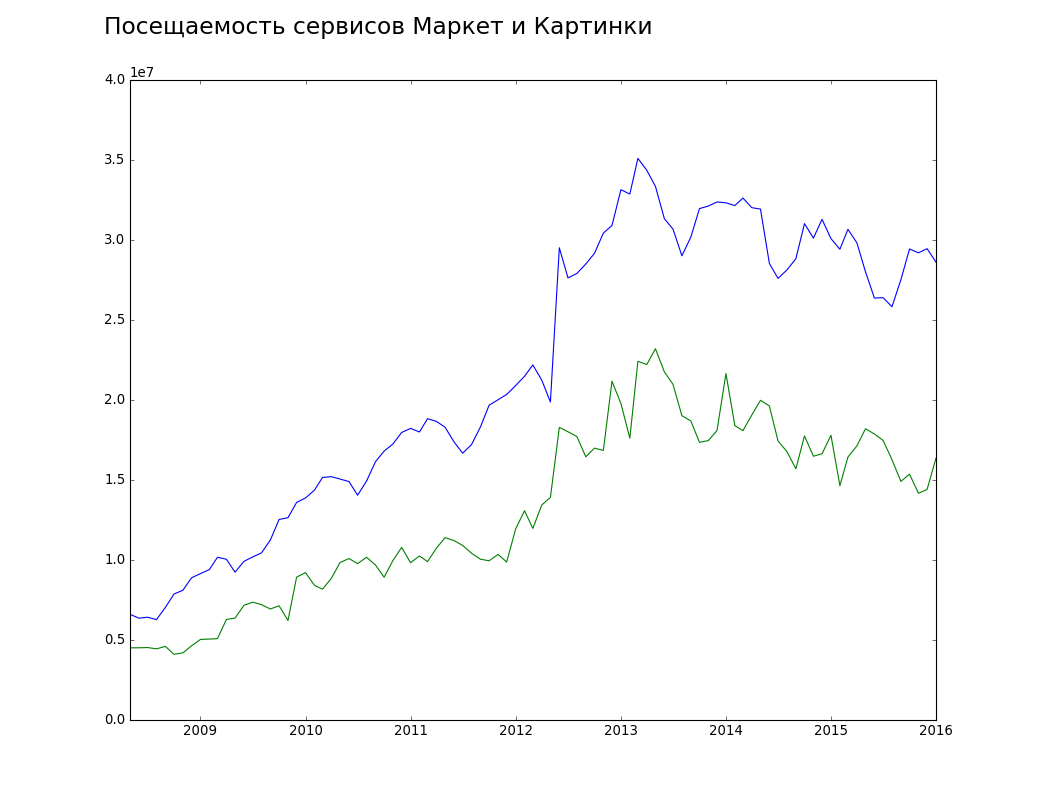

In [135]:
date_ranges = [] 

for i in xrange(len(df)):
    date_ranges.append(pd.date_range(df[i].index.tolist()[0], df[i].index.tolist()[-1], freq='MS'))    
    
for i in xrange(len(df)):
    df[i].index = date_ranges[i]

    
f = plt.figure(figsize=(13, 10), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)


plt.suptitle(u'Посещаемость сервисов Маркет и Картинки', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=21)
plt.plot(df[0])
plt.plot(df[1])

In [134]:
previous_months=[]

for i in xrange(len(df)):
        
    previsous

date_ranges[0][0] - DateOffset(months=1)

Timestamp('2008-04-01 00:00:00')

In [ ]:
f = plt.figure(figsize=(23, 10), dpi=80)
grid = matplotlib.gridspec.GridSpec(1,1)


plt.suptitle(u'Посещаемость Погоды', verticalalignment='top', horizontalalignment='left', x=0.1,  fontsize=36)
plt.plot(df2)
